# Titanic Data

### Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew (32% survival rate). This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

In this challenge, you're to complete the analysis of what sorts of people were likely to survive. In particular, apply the tools of machine learning to predict which passengers survived the tragedy.

### Overview

The data has been split into two groups:

training set (titanic_train.csv)
test set (titanic_test.csv)

The training set should be used to build your machine learning models. The training set includes the target (outcome) value for each passenger. Your model will be based on “features” like the passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. The test set lacks the target variable. It is the task of your model to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

Survived: 0 = No, 1 = Yes

Pclass: class 1 = 1st, 2 = 2nd, 3 = 3rd 

Sex: gender

Age: Age in years 

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic 

Ticket: ticket number

Fare: Passenger fare 

Cabin: Cabin number 

Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


   **Variable Notes**
   
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

SibSp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore Parch=0 for them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Inspect the features
Note which are numerical and which are categorical.

### Distribution of numerical features
Check for outliers.

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check for missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Distribution of categorical features
Which features can be dropped?
Which features may we want to complete/impute?

In [6]:
df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Master. William Frederick",male,347082,G6,S
freq,1,577,7,4,644


How many passengers survived?

What percentage of passengers traveled without a parent or child?

In [12]:
df.loc[df["Parch"] == 0, "Parch"].count()/df["Parch"].count()

0.7609427609427609

# Exploratory Data Analysis

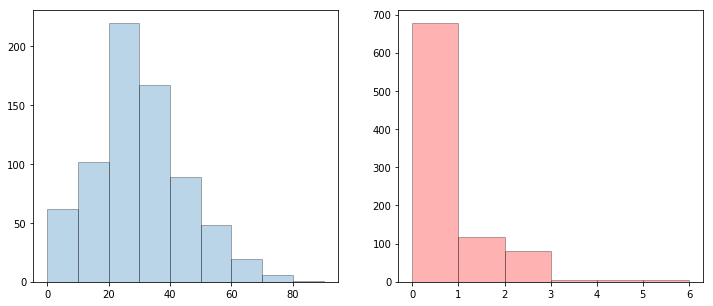

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].hist(df.loc[df.Age.notnull(),'Age'],  alpha=.3, edgecolor='black', bins=[0,10,20,30,40,50,60,70,80,90])
ax[1].hist(df['Parch'],  alpha=.3, color = 'red', edgecolor='black', bins=[0,1,2,3,4,5,6])
plt.show()

# Analyze by grouping (pivoting) features

### Explore relationships between categorical and continuous features

In [14]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [ ]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


### Visualize relationships between categorical and continuous features

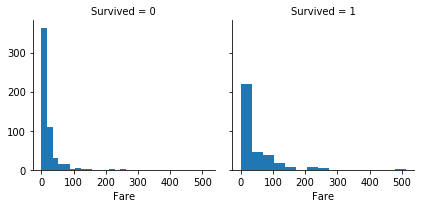

In [17]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Fare', bins=15)  # use age once imputed

In [ ]:
grid = sns.FacetGrid(df, col='Pclass', hue='Survived', height=4)
#grid = sns.FacetGrid(df, col='Survived', row='Pclass', hue='Survived', height=4, aspect=1.6)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)    # use age once imputed
grid.add_legend();

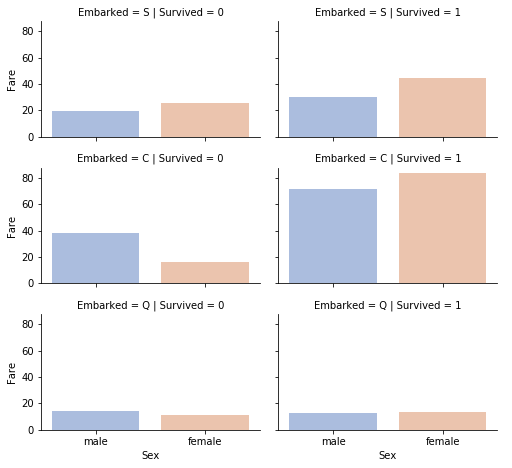

In [18]:
#grid = sns.FacetGrid(df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', order=["male", "female"], palette="muted", alpha=.5, ci=None)
grid.add_legend()

### Visualize relationships between multiple categorical features

C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


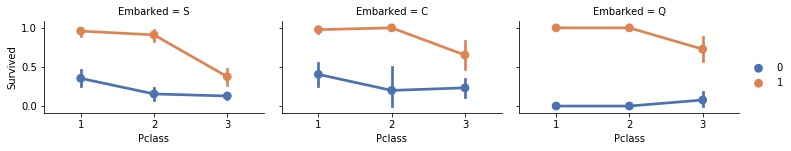

In [30]:
grid = sns.FacetGrid(df, col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = [1,2,3], hue_order=["male", "female"], palette='deep')
grid.add_legend()

### Drop poor features

In [ ]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Imputation

### Impute missing values (Embarked and Age)

***Impute 'Embarked'***

In [19]:
most_common_port = df.Embarked.value_counts().idxmax()
most_common_port

'S'

In [ ]:
df['Embarked'] = df['Embarked'].fillna(most_common_port)
    
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
# Converting a categorical feature
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

***Impute 'Age'***

Note: There is a relationship among the Age, Sex, and Pclass features. 

With this in mind, the mean Age, across sets of Pclass and Sex feature combinations (demonstrated below), can be determined. Then, for a given Pclass/Sex combination (e.g., male first class passengers), the imputed Age value can be a random value within 1 standard deviation of the mean Age for that Pclass/Gender combination. Alternatively, the median value for a given Pclass/Sex combinationcan be used for imputation.

In [20]:
# Converting a categorical feature
df["Sex"] = df["Sex"].map({'male':0, 'female':1})

In [21]:
# Males (coded as Sex=0),  First Class (coded as Pclass=1)
Age01_mean = df.loc[(df['Sex']==0) & (df['Pclass']==1), 'Age'].mean()
Age01_std = df.loc[(df['Sex']==0) & (df['Pclass']==1), 'Age'].std()
Age01_mean, Age01_std

(41.28138613861386, 15.139570471430352)

In [ ]:
# Males in Second Class
Age02_mean = df.loc[(df['Sex']==0) & (df['Pclass']==2), 'Age'].mean()
Age02_std = df.loc[(df['Sex']==0) & (df['Pclass']==2), 'Age'].std()
Age02_mean, Age02_std

In [22]:
# get the mean and std of Males in First Class
# randomly generate an Age within 1 standard deviation of the mean
Age01_impute = round(np.random.uniform(Age01_mean - Age01_std, Age01_mean + Age01_std))
Age01_impute

49

In [ ]:
# replace the null values with the imputed age
df.loc[(df["Age"].isnull()) & (df["Sex"]==0) & (df["Pclass"]==1),'Age'] = Age01_impute

# Feature Engineering
Perhaps create a new feature by creating Age or Fare bands (discretization).

In [26]:
# Create "AgeBand" feature

#df['AgeBand'] = pd.cut(df['Age'], 5)
#df['AgeBand'] = pd.cut(df['Age'], 4)
#df['AgeBand'] = pd.cut(df['Age'], [0,20,40,60,80])
#df['AgeBand'] = pd.cut(df['Age'], [0,20,40,60,80], labels=["child","adult","middle age","elder"])
df['AgeBand'] = pd.cut(df['Age'], [0,20,40,60,80], labels=[1,2,3,4])
df["AgeBand"].head()

0    2
1    2
2    2
3    2
4    2
Name: AgeBand, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
df.head()

In [ ]:
# manually creating AgeBands

df.loc[ dataset['Age'] < 20, 'Age'] = 1
df.loc[(dataset['Age'] >= 20) & (dataset['Age'] < 40), 'Age'] = 2
df.loc[(dataset['Age'] >= 40) & (dataset['Age'] < 60), 'Age'] = 3
df.loc[(dataset['Age'] >= 60), 'Age'] = 4

In [ ]:

df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
# review feature correltions
df.corr()

In [27]:
# Create "FamilySize" feature and perhaps drop "SibSp"/"Parch" which are highly correlated.
 
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [28]:
# Create IsAlone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
df.head()

Data Analysis: 
It appears that women, children, the upperclass, and those traveling with at least one other person, but no more than 2, had the best chances to survive the Titanic tragedy.

# Model and predict

In [ ]:
# ...
